In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers, optimizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/compresive_strength_concrete.csv")

In [4]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.shape

(1030, 9)

In [6]:
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


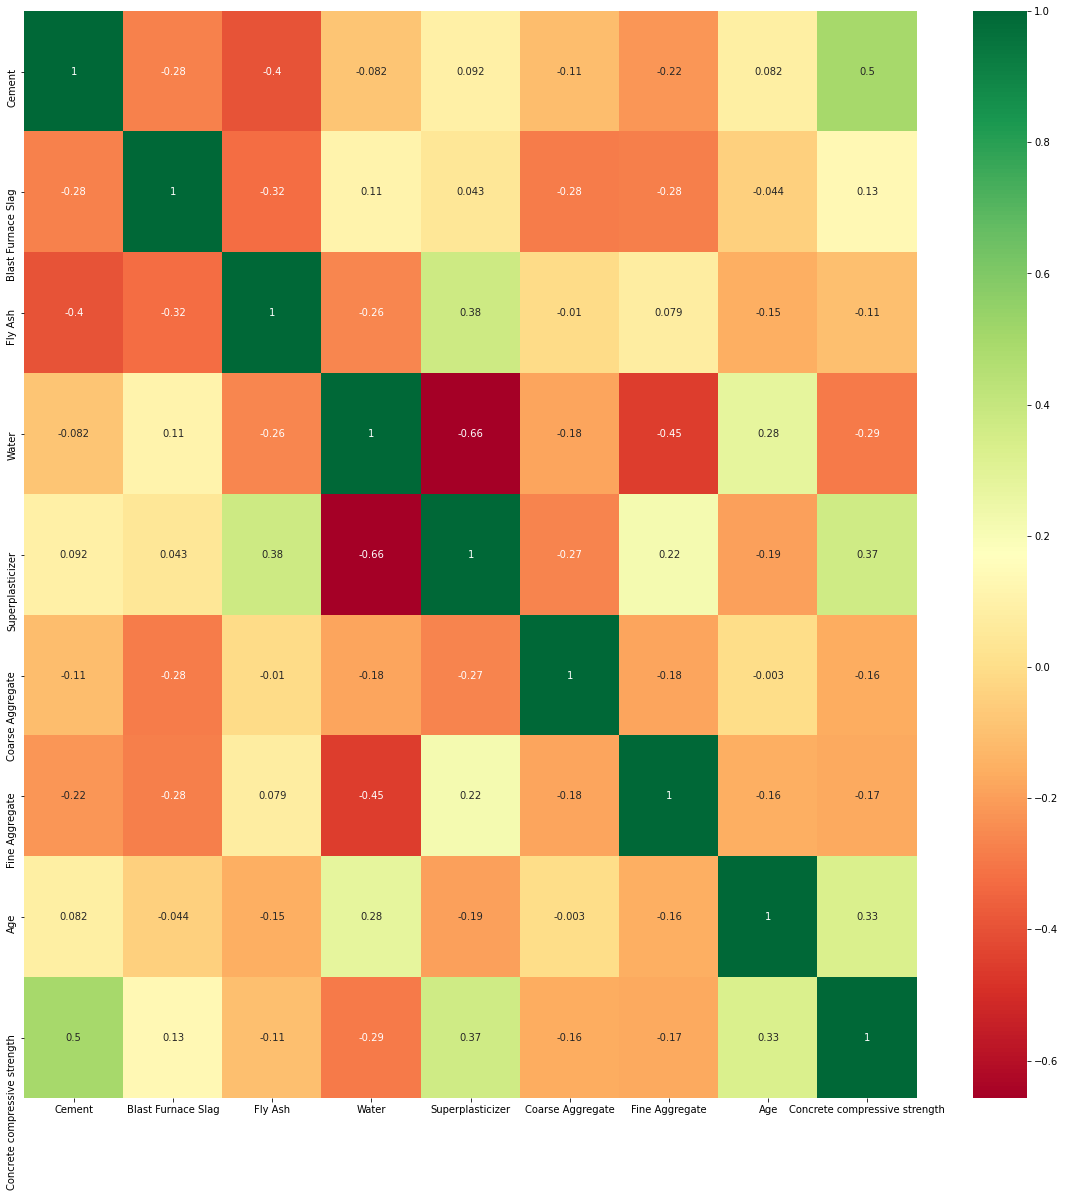

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
data.shape

(1030, 9)

In [10]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
x = data.drop(['Concrete compressive strength'], axis=1, inplace=False)
y = data['Concrete compressive strength']

In [12]:
x.shape

(1030, 8)

In [13]:
y.shape

(1030,)

In [14]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, Y_test = train_test_split(x, y, train_size = 0.5, test_size = 0.5, random_state=100)
x_valid, x_test, y_valid, y_test = train_test_split(X_test, Y_test, test_size = 0.3, random_state=100)

In [15]:
y_train[0]

79.99

In [16]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(x_train.shape[1],)))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [34]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
all_mae_histories = []
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate( [x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate( [y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  mae_history = history.history['mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [30]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print('All fold Validation Error: ', all_scores)
print('Mean of all fold Validation Error: ', np.mean(all_scores))
print('average_mae_history: ', average_mae_history)

All fold Validation Error:  [6.638636112213135, 8.952295303344727, 7.18848180770874, 6.160355567932129]
Mean of all fold Validation Error:  7.234942197799683
average_mae_history:  [56.052775382995605, 18.29123592376709, 14.377546787261963, 12.373595237731934, 11.378432750701904, 10.631963014602661, 10.013076782226562, 9.491909742355347, 9.101851463317871, 8.788434863090515, 8.676342606544495, 8.54820442199707, 8.529535174369812, 8.379478335380554, 8.258776068687439, 8.226735949516296, 8.174329996109009, 8.136605978012085, 8.06924855709076, 7.9559444189071655, 8.030206203460693, 7.83299458026886, 7.894965648651123, 7.83271598815918, 7.75327455997467, 7.684663891792297, 7.579503893852234, 7.583386421203613, 7.553908467292786, 7.442816972732544, 7.454291343688965, 7.3999069929122925, 7.286910176277161, 7.30843198299408, 7.294396638870239, 7.2299723625183105, 7.229371190071106, 7.17165744304657, 7.195831894874573, 7.205065965652466, 7.198048710823059, 7.1663395166397095, 7.057578921318054,

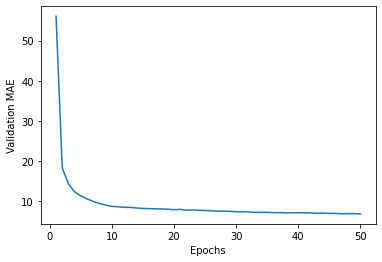

In [31]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

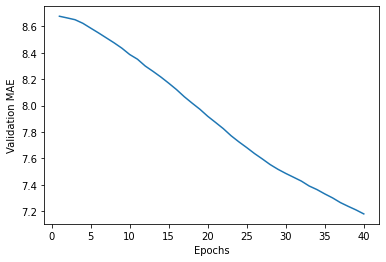

In [32]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [33]:
model = build_model()
model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=0)
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)
print(test_mae_score)

5/5 [==============================] - 0s 2ms/step - loss: 287.1632 - mae: 13.6358
13.635795593261719
